In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pygal
from collections import Counter
from matplotlib import pyplot as plt
from IPython.display import SVG, HTML, display

In [2]:
df = pd.read_csv('../data/test.csv')

In [3]:
df.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,004A07DM0IDW,1d688ec168932,1541555614,1,interaction item image,2059240,CO,"Santa Marta, Colombia",mobile,NaN,NaN,NaN
1,004A07DM0IDW,1d688ec168932,1541555614,2,interaction item image,2059240,CO,"Santa Marta, Colombia",mobile,NaN,NaN,NaN
2,004A07DM0IDW,1d688ec168932,1541555696,3,clickout item,1050068,CO,"Santa Marta, Colombia",mobile,NaN,2059240|2033381|1724779|127131|399441|103357|1...,70|46|48|76|65|65|106|66|87|43|52|44|60|61|50|...
3,004A07DM0IDW,1d688ec168932,1541555707,4,clickout item,1050068,CO,"Santa Marta, Colombia",mobile,NaN,2059240|2033381|1724779|127131|399441|103357|1...,70|46|48|76|65|65|106|66|87|43|52|44|60|61|50|...
4,004A07DM0IDW,1d688ec168932,1541555717,5,clickout item,1050068,CO,"Santa Marta, Colombia",mobile,NaN,2059240|2033381|1724779|127131|399441|103357|1...,70|46|48|76|65|65|106|66|87|43|52|44|60|61|50|...


In [4]:
# only 1/15 of the interactions have filters applied
df.count()

user_id            3782335
session_id         3782335
timestamp          3782335
step               3782335
action_type        3782335
reference          3520604
platform           3782335
city               3782335
device             3782335
current_filters     342844
impressions         528779
prices              528779
dtype: int64

In [5]:
# number of unique users
unique_user_count = len(df['user_id'].unique())
unique_user_count

250852

In [6]:
# number of unique sessions
unique_session_count = len(df['session_id'].unique())
unique_session_count

291381

In [7]:
clickout_item_action_count = len(df[df['action_type'] == 'clickout item'])
clickout_item_action_count

528779

In [8]:
# sessions per user
sessions_per_user_df = df[['user_id', 'session_id']].drop_duplicates().groupby('user_id').count()

In [9]:
session_count_df = pd.DataFrame.from_dict(Counter(sessions_per_user_df['session_id']), orient='index')
session_count_df = session_count_df.sort_index().rename(columns={0: 'user_count'})
session_count_df.index.name = 'session_count'
session_count_df

,user_count
session_count,
1,220131
2,24119
3,4652
4,1238
5,428
6,156
7,73
8,26
9,8


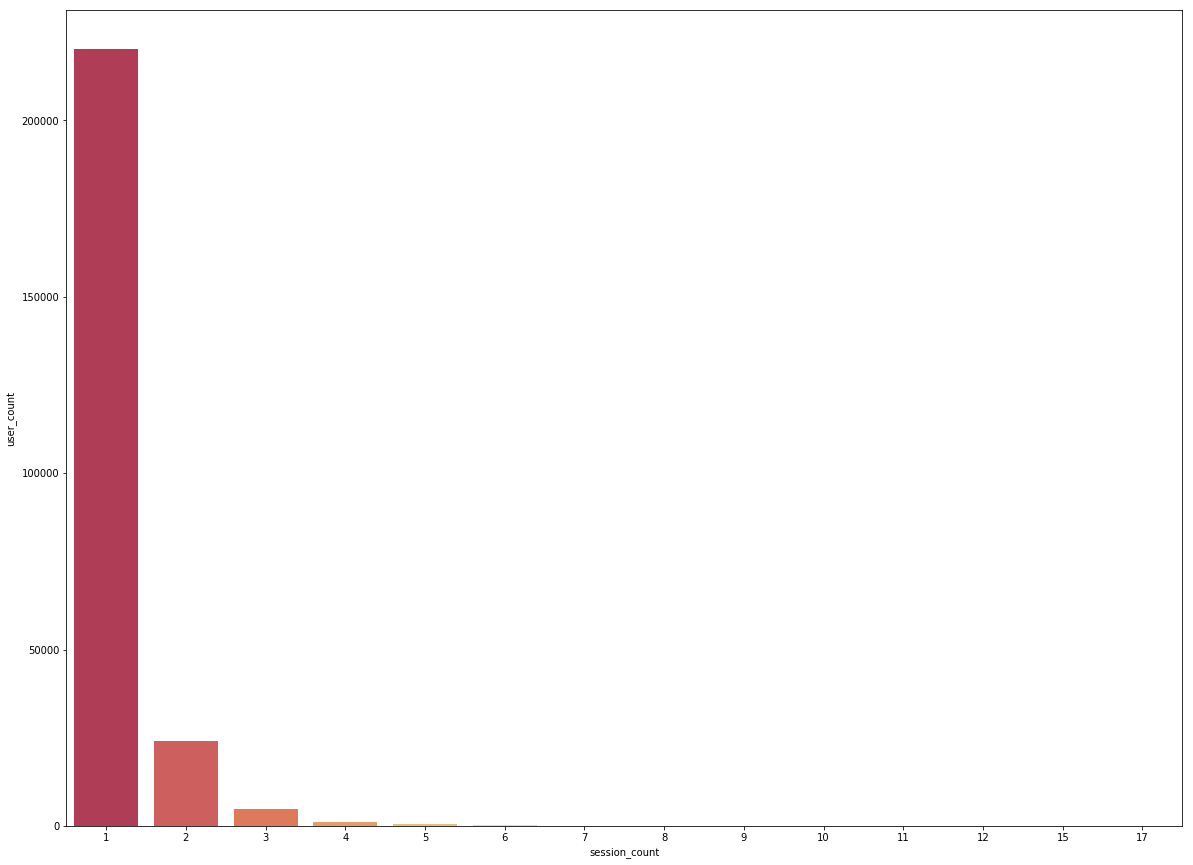

In [11]:
plt.figure(2, figsize=(20,15))
sns.barplot(x='session_count',y='user_count', data=session_count_df.reset_index(), palette='Spectral')

In [12]:
# clickouts per session
df_clickouts_per_session = df[df['action_type'] == 'clickout item']['session_id'].value_counts()
session_ids_with_clickout = set(df_clickouts_per_session.index)

all_unique_session_ids = set(df['session_id'].unique())
session_ids_without_clickout = all_unique_session_ids.difference(session_ids_with_clickout)

print('Number of unique sessions: {}'.format(len(all_unique_session_ids)))
print('Sessions WITH a "clickout item" action: {}'.format(len(session_ids_with_clickout)))
print('Sessions WITHOUT a "clickout item" action: {}'.format(len(session_ids_without_clickout)))

Number of unique sessions: 291381
Sessions WITH a "clickout item" action: 275679
Sessions WITHOUT a "clickout item" action: 15702


,number of clickouts in a session,number of sessions
0,1,167726
1,2,55049
2,3,23108
3,4,11621
4,5,6350
5,6,3942
6,7,2323
7,8,1516
8,9,1027
9,10,768


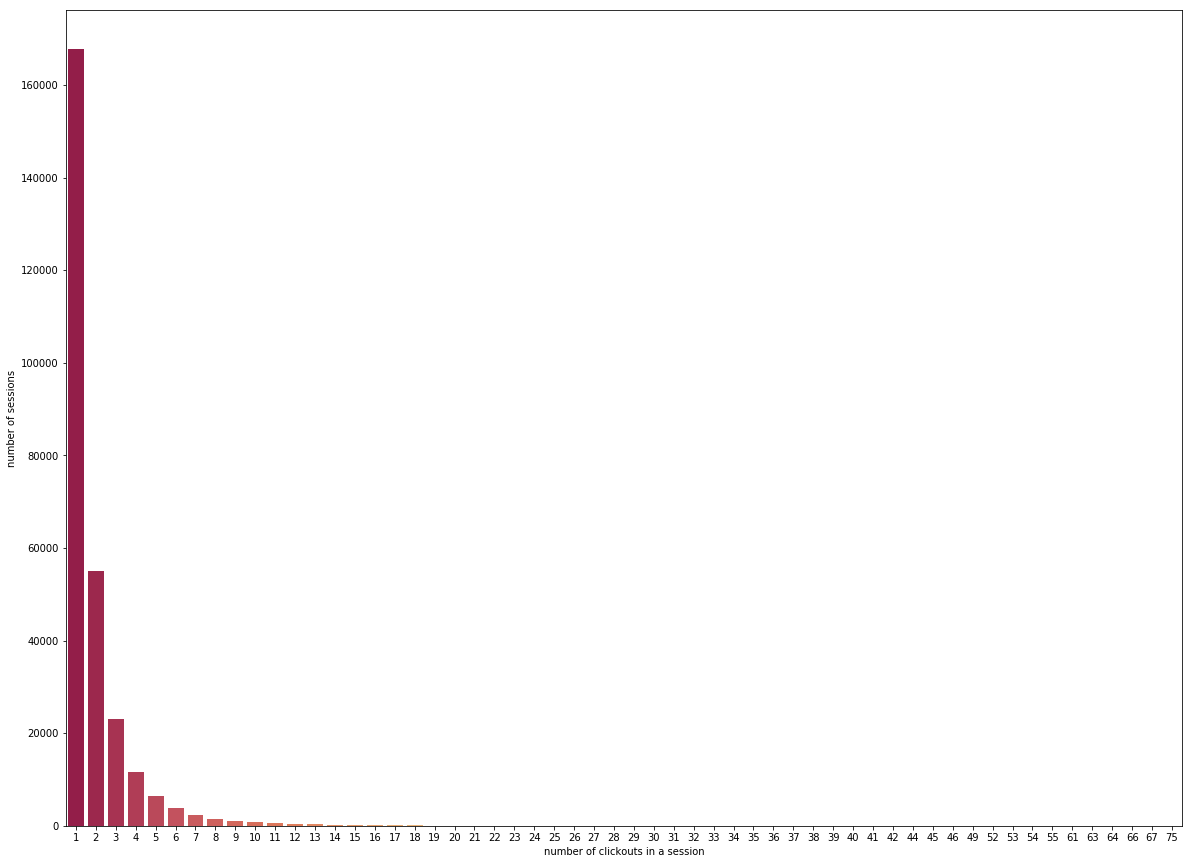

In [13]:
x_label = 'number of clickouts in a session'
y_label = 'number of sessions'

df_clickout_distribution = df_clickouts_per_session.value_counts().reset_index().rename(columns={'index': x_label, 'session_id': y_label})

plt.figure(2, figsize=(20,15))
sns.barplot(
    x=x_label,
    y=y_label,
    data=df_clickout_distribution,
    palette='Spectral'
)

df_clickout_distribution.head(15)

In [14]:
# distrubtion of actions over time
df['timestamp'].describe().apply(lambda time: pd.to_datetime(time, unit='s')).drop(['count', 'std'])

mean   2018-11-08 01:05:43.428224087
min    2018-11-07 00:00:07.000000000
25%    2018-11-07 14:11:18.000000000
50%    2018-11-07 23:32:09.000000000
75%    2018-11-08 13:58:36.000000000
max    2018-11-08 23:59:59.000000000
Name: timestamp, dtype: datetime64[ns]

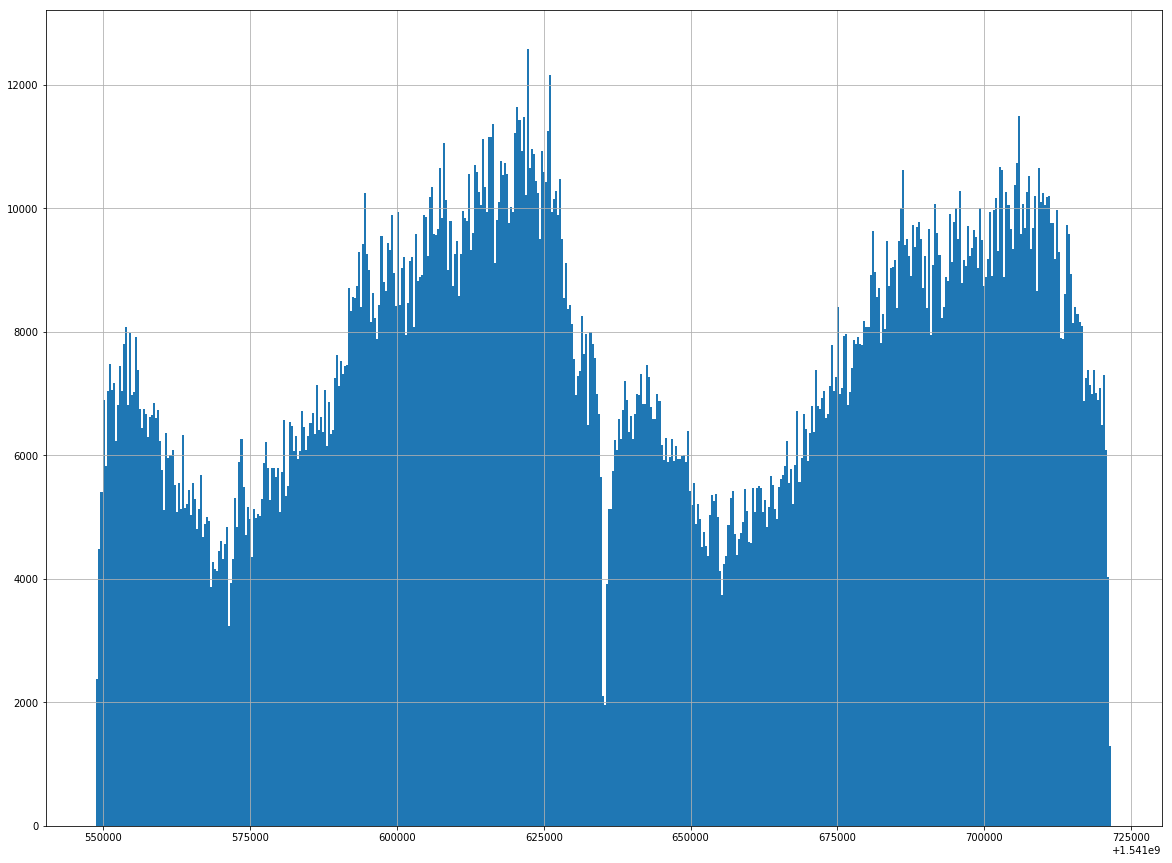

In [15]:
df['timestamp'].hist(bins=500, figsize=(20,15))

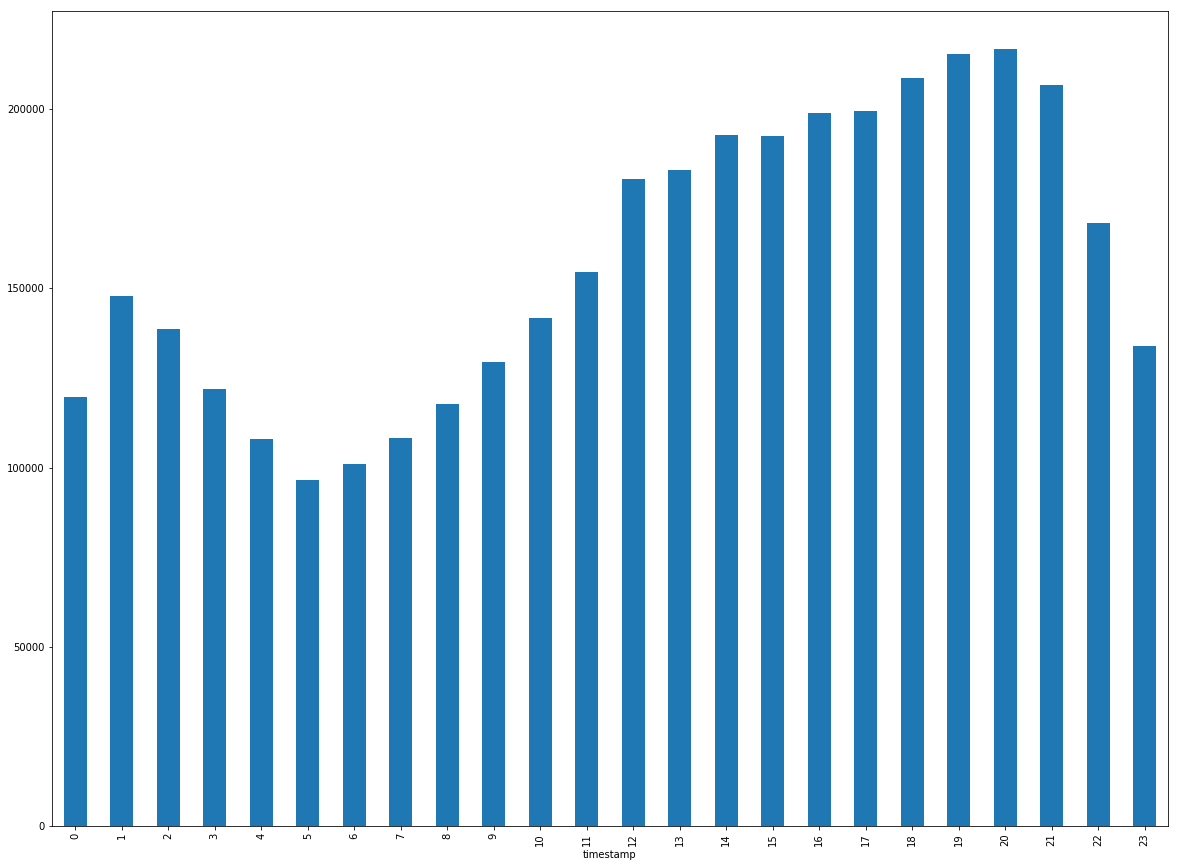

In [16]:
df_date_time = pd.to_datetime(df['timestamp'], unit='s')

# distribution of actions over hour of day
plt.figure(figsize=(20,15))
df_date_time.groupby(df_date_time.dt.hour).count().plot(kind="bar")

In [17]:
action_types_hist = Counter(df['action_type'])

In [18]:
action_types_df = pd.DataFrame.from_dict(action_types_hist, orient='index').reset_index()
action_types_df = action_types_df.rename(columns={'index': 'action_type', 0: 'count'})
action_types_df = action_types_df.sort_values(by=['count'], ascending=False)
action_types_df

,action_type,count
0,interaction item image,2578455
1,clickout item,528779
4,filter selection,193499
3,change of sort order,117826
5,search for destination,115144
2,interaction item info,68101
7,interaction item rating,53704
9,search for item,43065
8,interaction item deals,42147
6,search for poi,41615


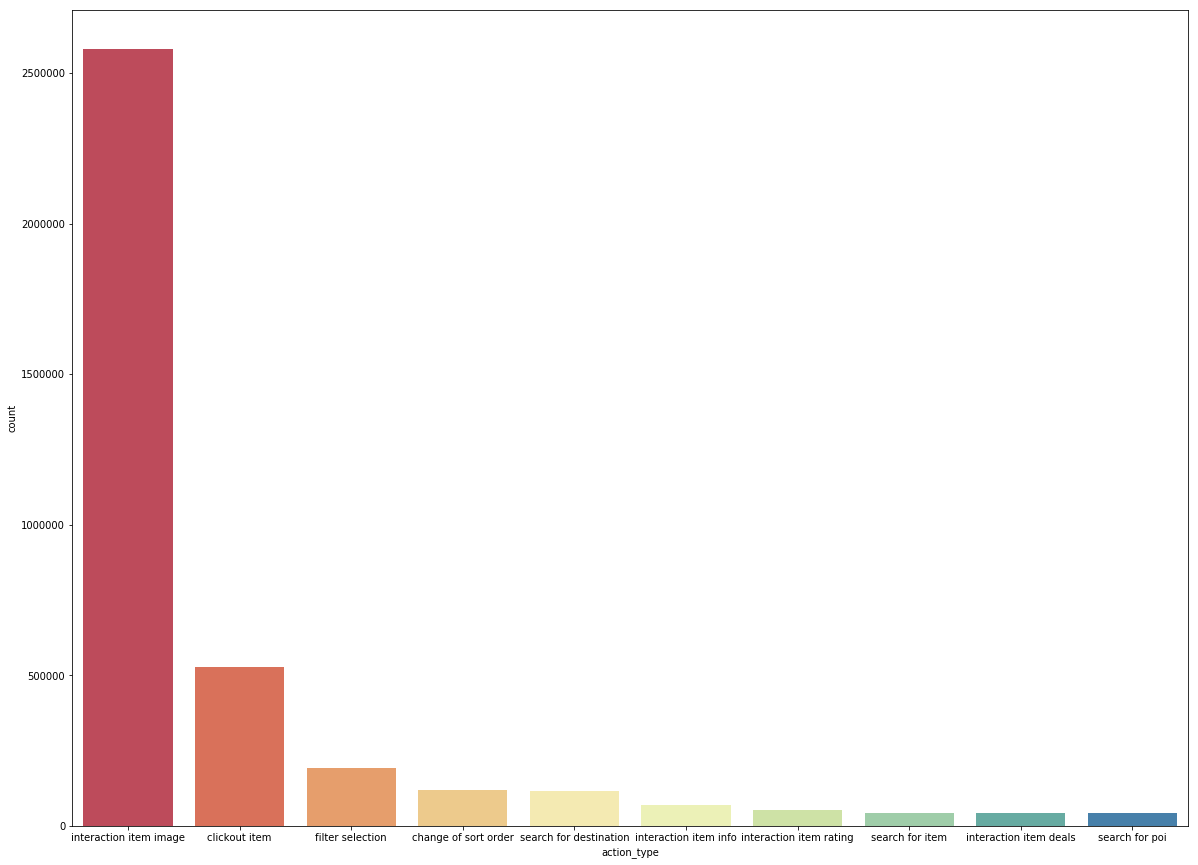

In [19]:
plt.figure(2, figsize=(20,15))
sns.barplot(x='action_type',y='count', data=action_types_df, palette='Spectral')

In [20]:
platform_df = pd.DataFrame.from_dict(Counter(df['platform']), orient='index').reset_index()
platform_df = platform_df.rename(columns={'index': 'country', 0: 'count'})
platform_df = platform_df.sort_values(by='count', ascending=False)
platform_df

,country,count
17,BR,564722
21,US,447827
9,DE,229351
6,UK,218635
8,MX,210202
1,IN,173922
4,JP,151119
5,TR,139898
16,AU,137024
24,IT,116716


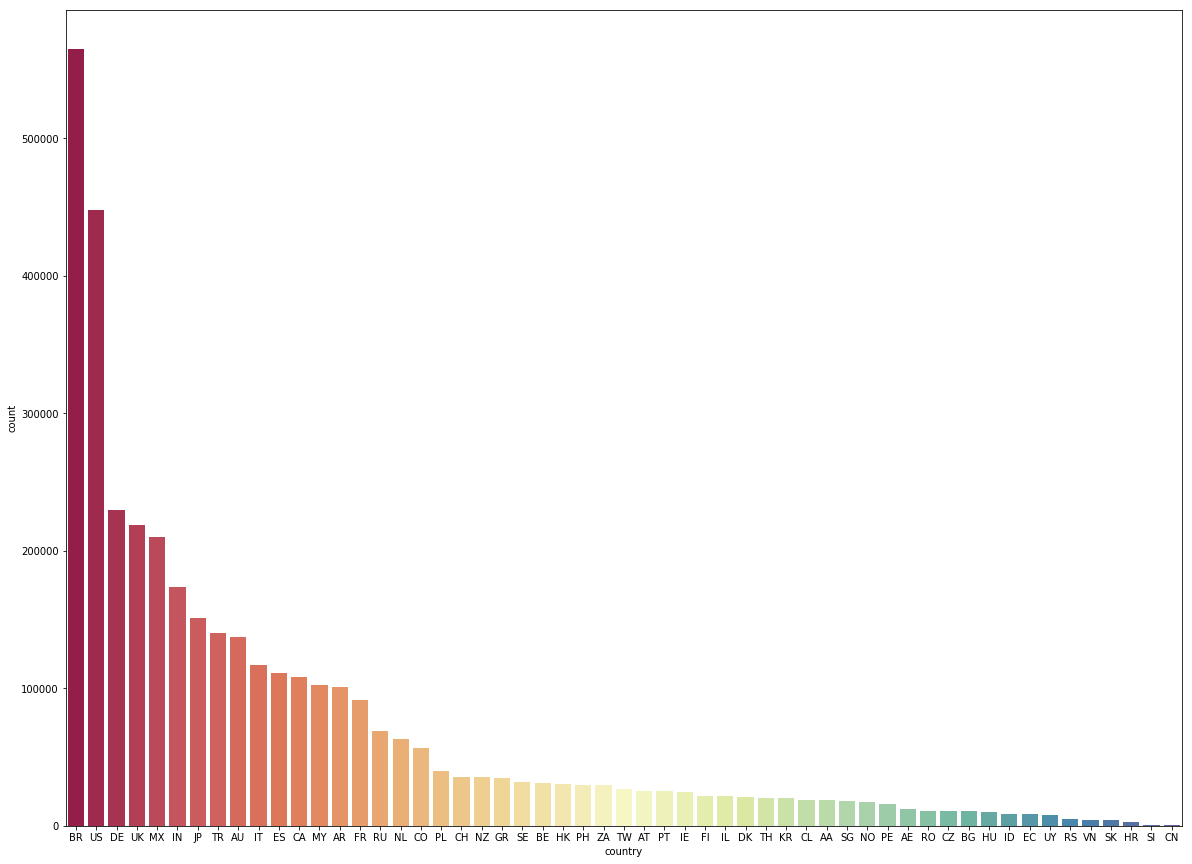

In [21]:
plt.figure(figsize=(20,15))
sns.barplot(x='country',y='count', data=platform_df, palette='Spectral')

In [22]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Actions by Country'
worldmap_chart.add('Country', values=Counter(df['platform'].str.lower()))

worldmap_chart.render_to_file('02-actions_by_country_test.svg')

# display(SVG(worldmap_chart.render(disable_xml_declaration=True, is_unicode=True)))
# display({'image/svg+xml': worldmap_chart.render()}, raw=True)
# display(SVG(data=worldmap_chart.render()))

In [23]:
Counter(df['device'])

Counter({'mobile': 1683352, 'desktop': 1831157, 'tablet': 267826})

In [24]:
step_df = pd.DataFrame.from_dict(Counter(df['step']), orient='index').reset_index()
step_df = step_df.rename(columns={'index': 'number_of_steps', 0: 'count'})
step_df['cum_sum'] = step_df['count'].cumsum()
step_df['cum_percentage'] = 100 * (step_df['cum_sum'] / step_df['count'].sum())
step_df

,number_of_steps,count,cum_sum,cum_percentage
0,1,291385,291385,7.703839
1,2,220301,511686,13.528310
2,3,174765,686451,18.148868
3,4,143134,829585,21.933144
4,5,122126,951711,25.161996
5,6,106454,1058165,27.976501
6,7,95025,1153190,30.488838
7,8,86404,1239594,32.773247
8,9,79406,1319000,34.872638
9,10,73803,1392803,36.823893


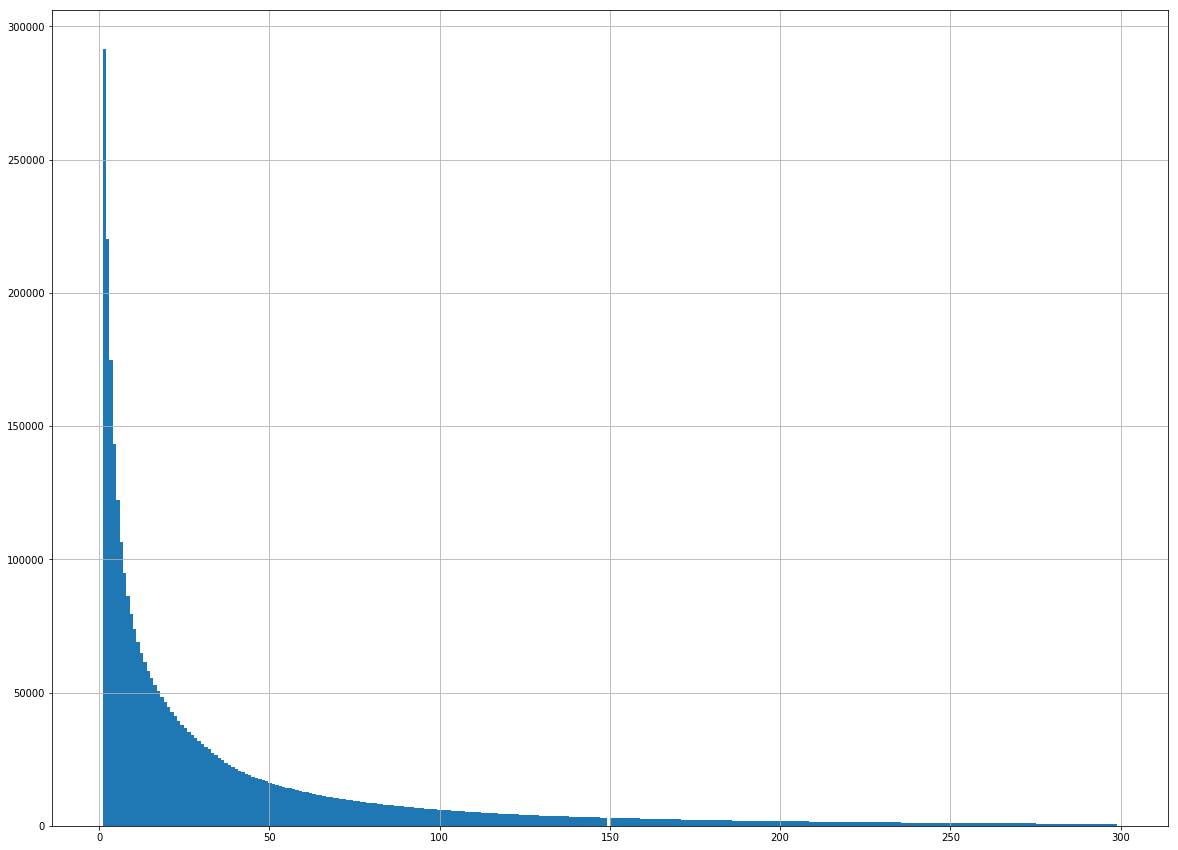

In [25]:
# distribution of number of steps per session

df['step'][df['step'] < 300].hist(bins=300, figsize=(20, 15))

In [26]:
df_filters = df['current_filters'].dropna().apply(lambda x: x.split('|'))
df_filters

13                                           [Sort by Price]
14                                           [Sort by Price]
15                                           [Sort by Price]
21                                           [Hotel, Resort]
22                                           [Hotel, Resort]
43                                           [Hotel, Resort]
44                                           [Hotel, Resort]
47                                           [Hotel, Resort]
48                                           [Hotel, Resort]
49                                           [Hotel, Resort]
54                            [Hotel, Resort, Sort by Price]
55                            [Hotel, Resort, Sort by Price]
57                            [Hotel, Resort, Sort by Price]
58                            [Hotel, Resort, Sort by Price]
59                            [Hotel, Resort, Sort by Price]
60                            [Hotel, Resort, Sort by Price]
61                      

In [27]:
all_filters = np.hstack(df_filters.ravel())

In [28]:
df_unique_filters = pd.DataFrame.from_dict(Counter(all_filters), orient='index').reset_index()
df_unique_filters = df_unique_filters.rename(columns={'index': 'filter', 0: 'count'})
df_unique_filters = df_unique_filters.sort_values(by='count', ascending=False)
df_unique_filters.head(20)

,filter,count
1,Hotel,102716
0,Sort by Price,80816
23,5 Star,78988
2,Resort,76433
26,4 Star,72227
24,Hostal (ES),64786
12,Motel,63157
10,Focus on Distance,58401
29,3 Star,41780
3,Best Value,35342


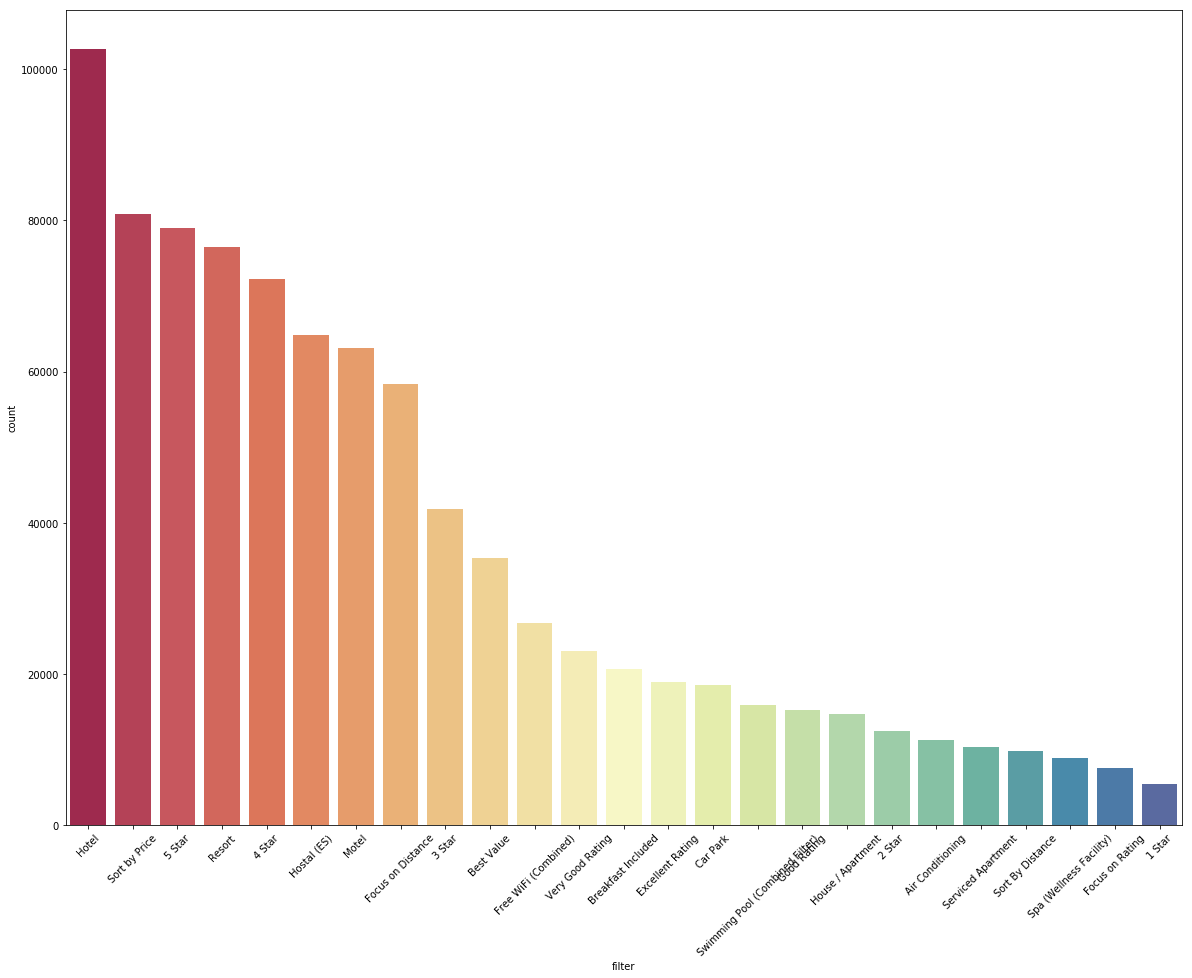

In [29]:
# most used filters by users

plt.figure(figsize=(20,15))
filter_plot = sns.barplot(x='filter',y='count', data=df_unique_filters.head(25), palette='Spectral')
for item in filter_plot.get_xticklabels():
    item.set_rotation(45)